# Quantum-Deutsch
***

<br>

## Comparison of Quantum Computing and Classical Computing

****

<br>

<h4>What is a quantum computer?</h4>

<p>A quantum computer is a machine, built similar to your conventional computer but quantum computers use properties described by quantum physics, used to perform calculations and store data.

Quantum computers are still not as popular compared to classical computers due to economic reasons but many believe quantum computers will soon take over supercomputers due to performance as companie across different fields of science are experimenting with quantum computers to advance technology and develop things.</p>

<p>Some of the fields that use quantum computers include: </p>

- Artifical Intelligence
- Cybersecurity
- Weather Forecasting
- Healthcare
- Finance Modelling

<br>

<h4>How does a quantum computer work?</h4>

<p>Quantum Computing is centered around Quantum Mechanics particularly 'superstition' and 'entanglement', it uses computers to perform calculations using qubits (a quantum bit) but instead of only being in a single state at one time, qubits can be represented using 0 or 1 simultaneously meaning it can be in more than one state at a time.

These states are undefined properties of an object before detected, which can be something such as the elctron spin or polarisation of a photon.

This allows quantum computers to perform complex mathematical calculations, e.g. Hilbert’s Tenth Problem and Kruskal’s tree theorem
or it can solve problems such as producing diffcult to break security codes and predicting real world events</p>

<br>

<h4>What is the difference between quantum computing and classical computing?</h4>

<p>Computer have been around since the 19th century and where we started with the use of classical/conventional computing but as time has past and technology evolves we seem to be heading into a direction of computing known now as 'quantum computing' which looks set to completely take over from classical computing.

When refering to the term 'Classical Computing' centered around 'electrical circuits', we are refering to use of computers to perform calculations with transisitors and the use of bits where info is stored and represented using  0 meaning 'Off' and 1 eaning 'On', classical computing is still supported to this day.

Now in contrast, 'Quantum Computing' is centered around Quantum Mechanics particularly 'superstition' and 'entanglement', it uses computers to perform calculations using qubits (a quantum bit) but instead of only being in a single state at one time, qubits can be represented using 0 or 1 simultaneously meaning it can be in more than one state at a time, giving it an advantage which allows quantum computers to process more data.

Other differences between classical and quantum computing includes:

- Quantum computing has a higher error rate compared to Classical computing which has a low error rate.
- More everyday tasks are completed using Classical computing rather than Quantum computing, quantum is better for tasks such as Simultations and Data Analysis.
- Quantum computers are not for simple, everyday use and are used for used mainly in scientific fields which is the opposite of classical computers which are made for common, everyday use.
- Classical computing uses classical physics while Quantum Computing uses quantum mechanics and quantum physics.
- Classical computing uses your usual programming languages i.e. Java, C#, Python while Quantum computing does not, requiring the development of specific algorithms.</p>

<br>

<h4>Deutsch-Jozsa Algorithm</h4>

****

In [18]:
# Stabdard imports
import qiskit as q
import matplotlib.pyplot as plt  
import numpy as np

# Importing tools
from qiskit import QuantumCircuit, execute, Aer, BasicAer, IBMQ, assemble, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

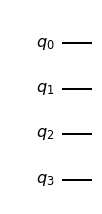

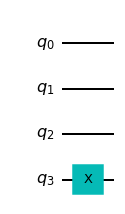

In [19]:
n=3

f0circuit = q.QuantumCircuit(n + 1) 

display(f0circuit.draw('mpl'))

f1circuit = q.QuantumCircuit(n + 1) 
f1circuit.x(n)

display(f1circuit.draw('mpl'))

In [20]:
f01circuit = q.QuantumCircuit(n + 1)

xgates = "101"
cxgates= "101"

f01circuit.x(n)
f01circuit.h(n)

f01circuit.barrier()

for i in range(n):
    if f01circuit[i] == '1':
        f01half.x(i)

for m in range(n):
    if cxgates[m] == '1':
        f01circuit.cx(m, n)

for k in range(n):
    if xgates[k] == '1':
        f01circuit.x(k)
        
f01circuit.barrier()

f01circuit.draw()

░      ┌───┐      ░ 
q_0: ───────────░───■──┤ X ├──────░─
                ░   │  └───┘      ░ 
q_1: ───────────░───┼─────────────░─
                ░   │       ┌───┐ ░ 
q_2: ───────────░───┼────■──┤ X ├─░─
     ┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐└───┘ ░ 
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├──────░─
     └───┘└───┘ ░ └───┘└───┘      ░

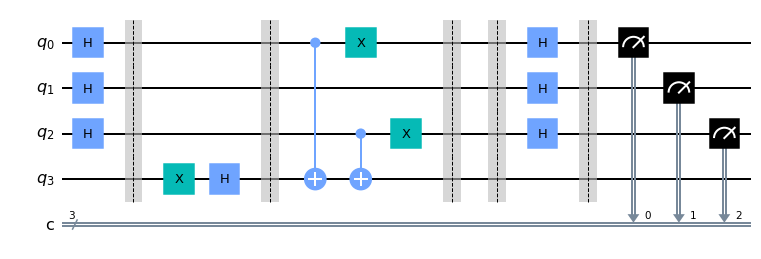

In [21]:
dj_circuit = q.QuantumCircuit(n + 1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.barrier()

dj_circuit = dj_circuit + f01circuit
dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.h(qubit)
    
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i, i)

dj_circuit.draw('mpl')

In [22]:
backend = BasicAer.get_backend('qasm_simulator')
backend

<QasmSimulatorPy('qasm_simulator')>

In [23]:
shots = 1024
shots

1024

In [24]:
results = execute(dj_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()
counts

{'101': 1024}

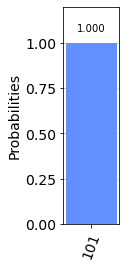

In [25]:
plot_histogram(counts, figsize=(1, 4))

In [26]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2021-12-11 12:32:03,806: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_lima


In [27]:
job = execute(dj_circuit, backend=backend, shots=1024)

In [28]:
answer = job.result().get_counts()
answer

{'000': 11, '001': 42, '100': 62, '101': 892, '110': 2, '111': 15}

In [29]:
job_monitor(job, interval=2)

Job Status: job has successfully run


In [30]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

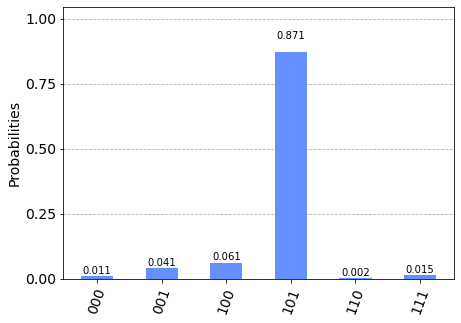

In [31]:
plot_histogram(answer)

****

## End